### Importing Required Libraries

In [34]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt

### Importing Required Libraries for Neural Networks and Image Processing

This code snippet imports libraries necessary for neural network modeling and image processing tasks.

In [35]:
from sklearn.neural_network import MLPClassifier

import os
from os import listdir
from PIL import Image
import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- `input_shape_2D`: Represents the input shape for 2D data, such as grayscale images, with dimensions of 224x224 pixels.
  
- `input_shape_3D`: Represents the input shape for 3D data, such as RGB images, with dimensions of 224x224 pixels and 3 color channels (Red, Green, Blue).

- `seed`: The seed value set to 1 is used for random number generation. Setting a seed ensures reproducibility in random processes, making your results consistent across runs.

- `batch_size`: Specifies the number of samples per batch during training. A batch size of 32 means that the model will update its weights after processing 32 samples.

- `epochs`: Refers to the number of times the entire dataset is passed forward and backward through the neural network during training. In this case, the training process will iterate 30 times over the dataset.


In [36]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 10
epochs = 30

- `directory`: Specifies the directory from which the image dataset will be loaded. In this case, it's set to "rice_leaf_diseases".

- `labels`: Indicates how labels should be generated. Using 'inferred' means the labels will be automatically inferred from the directory structure.

- `label_mode`: Specifies the type of labels to use. 'int' indicates integer labels will be used.

- `class_names`: If provided, this parameter specifies the list of class names. Since it's set to None, class names will be inferred from the directory structure.

- `color_mode`: Specifies the color mode of the images. 'rgb' indicates that images will be loaded in RGB format.

- `image_size`: Sets the target size for images. Here, it's set to (224, 224), indicating images will be resized to 224x224 pixels.

- `seed`: The seed value used for shuffling the dataset, ensuring consistency in random processes.


In [37]:
data = tf.keras.utils.image_dataset_from_directory(directory="rice_leaf_diseases",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None ,
                                                  color_mode='rgb',
                                                  image_size=input_shape_2D,
                                                  seed=seed)

Found 283 files belonging to 7 classes.


In [38]:


class_names = data.class_names
class_names

['Bacterial leaf blight',
 'Blast',
 'Brown spot',
 'Healthy',
 'Hispa',
 'Leaf smut',
 'Tungro']

- `plt.figure(figsize=(10,10))`: Creates a new figure for plotting with a size of 10x10 inches.

- `for images , labels in data.take(1):`: Iterates through the first batch of images and labels from the dataset `data`.

  - `for i in range(25):`: Loops through 25 images in the batch.

    - `plt.subplot(5,5,i+1)`: Creates a subplot grid of 5 rows and 5 columns, with each iteration incrementing the subplot index by 1.

    - `plt.imshow(images[i].numpy().astype('uint8'))`: Displays the current image in the subplot. The image is converted to a numpy array and cast to 'uint8' data type for visualization.

    - `plt.title(class_names[labels[i]])`: Sets the title of the subplot to the corresponding class name based on the label.

    - `plt.axis('off')`: Turns off the axis labels for better visualization.

  - `plt.tight_layout()`: Adjusts the subplot layout to prevent overlapping.




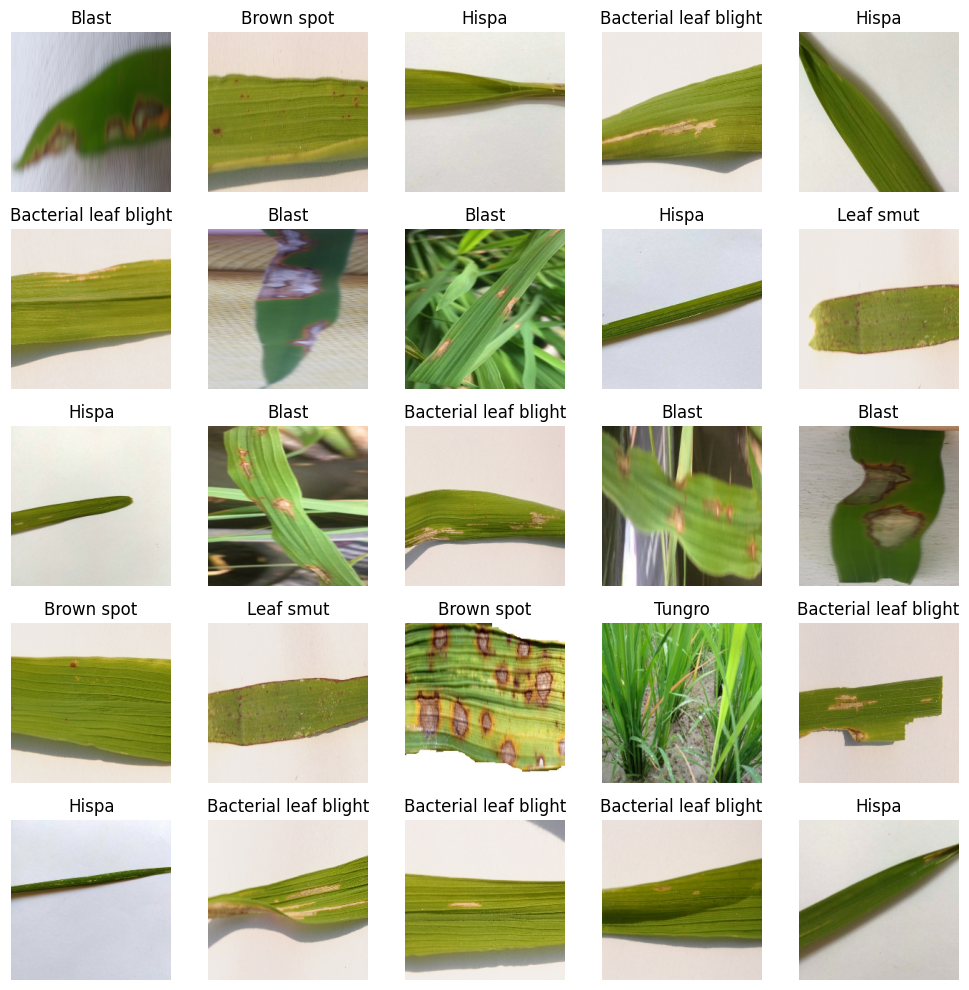

In [39]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

Extracts labels from the dataset, converts them into a DataFrame, and plots the class distribution using a count plot

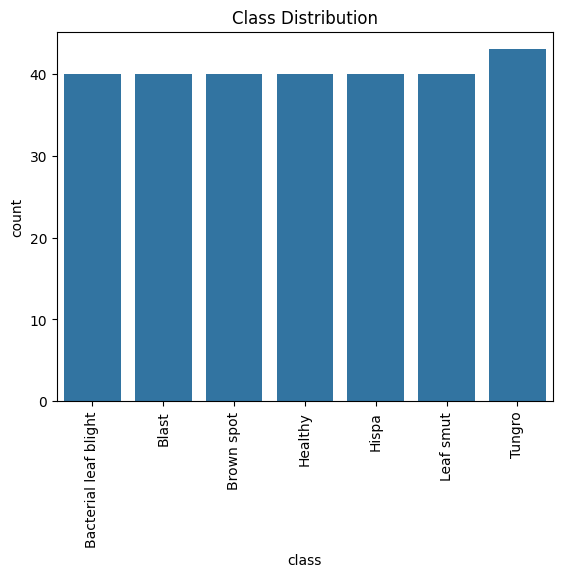

In [40]:

labels = []
for _, label in data:
    labels.extend(label.numpy())

df = pd.DataFrame(labels, columns=['class'])

# Plot class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xticks(ticks=range(len(data.class_names)), labels=data.class_names, rotation=90)
plt.show()

Creates a dictionary to store images for each class in the dataset, initialized with empty lists for each class.
Iterates over the dataset, converts labels to numpy arrays for indexing, and collects images for each class into their respective lists in the dictionary.
The dictionary 'images_dict' now contains lists of images grouped by their corresponding class names from the dataset.


In [41]:

images_dict = {class_name: [] for class_name in data.class_names}


for images, labels in data:
  
    labels = labels.numpy()
 
    for i, class_name in enumerate(data.class_names):
   
        class_images = images.numpy()[labels == i]
    
        images_dict[class_name].extend(class_images)

Creates a dictionary 'avg_color_channels' to store the average color channels for each class in the dataset, initialized with empty lists for each class.
Calculates the average color channels for each image in the 'images_dict' dictionary and appends them to the corresponding class list in 'avg_color_channels'.
Computes the overall average of the average color channels for each class in 'avg_color_channels'.

In [44]:

avg_color_channels = {class_name: [] for class_name in data.class_names}


for class_name, images in images_dict.items():

    for image in images:
   
        avg_color = image.mean(axis=(0, 1))

        avg_color_channels[class_name].append(avg_color)


for class_name, colors in avg_color_channels.items():
    avg_color_channels[class_name] = np.mean(colors, axis=0)


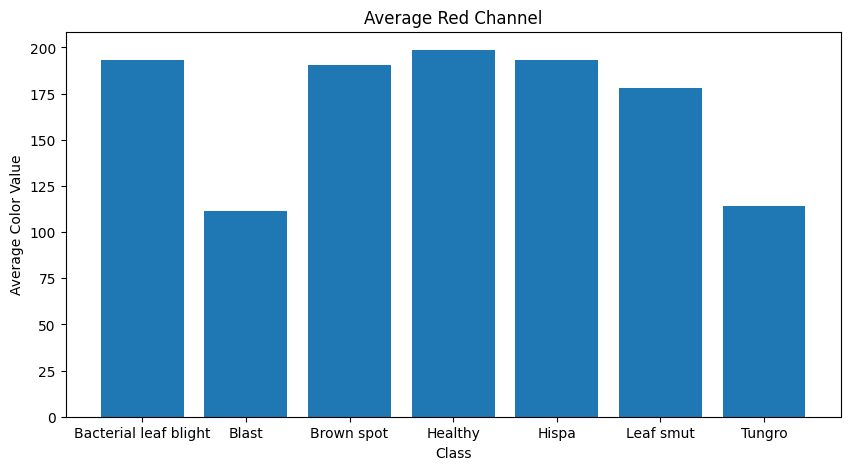

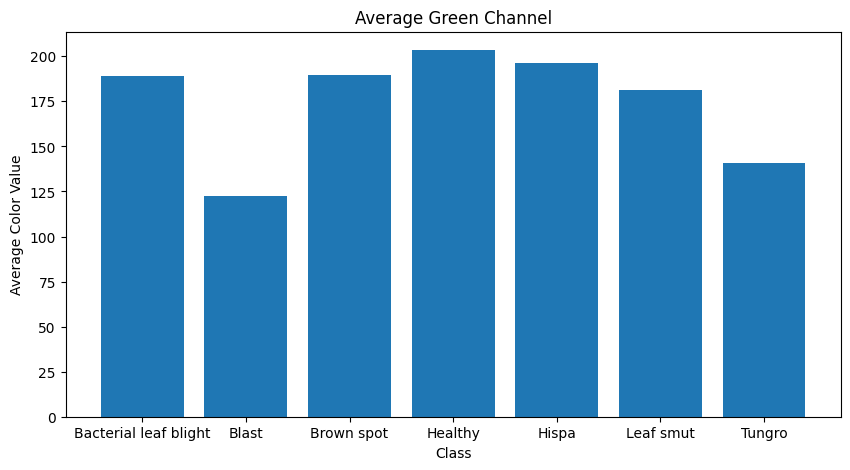

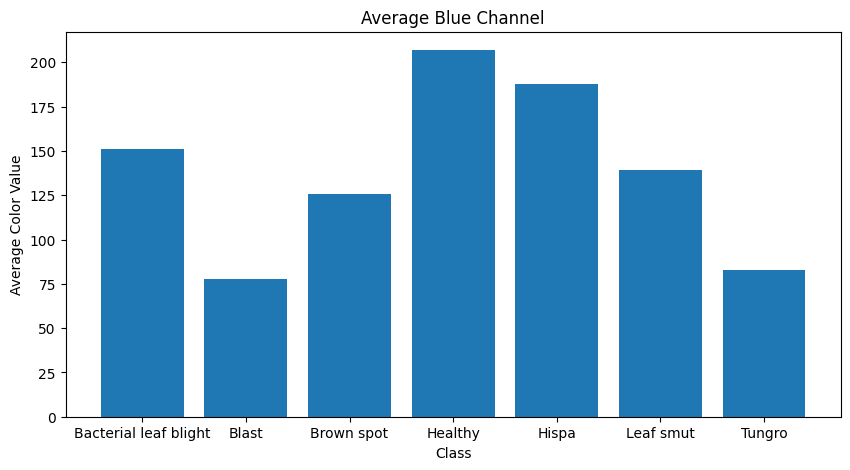

In [45]:
# For each color channel
for i, color in enumerate(['Red', 'Green', 'Blue']):
    # Create a new figure
    plt.figure(figsize=(10, 5))
    # Create a bar chart
    plt.bar(avg_color_channels.keys(), [colors[i] for colors in avg_color_channels.values()])
    # Set the title
    plt.title(f'Average {color} Channel')
    # Set the x-axis label
    plt.xlabel('Class')
    # Set the y-axis label
    plt.ylabel('Average Color Value')
    # Show the plot
    plt.show()

Red: Positive correlation (values closer to 1). Diseases with red correlation tend to have similar visual characteristics in the average image.
Blue: Negative correlation (values closer to -1). Diseases with blue correlation tend to have dissimilar visual characteristics in the average image.
Black: No correlation (value around 0).

Disease Labels:

On the x and y axes, the labels for the different rice leaf diseases present in the data (data.class_names).

Interpreting Correlations:

 in the heatmap 

Bacterial leaf blight and Blast have a high positive correlation (around 0.75). This suggests that the average images for these diseases share many similarities.
Bacterial leaf blight and Tungro have a negative correlation (around -0.75). This suggests that the average images for these diseases have dissimilar visual characteristics.

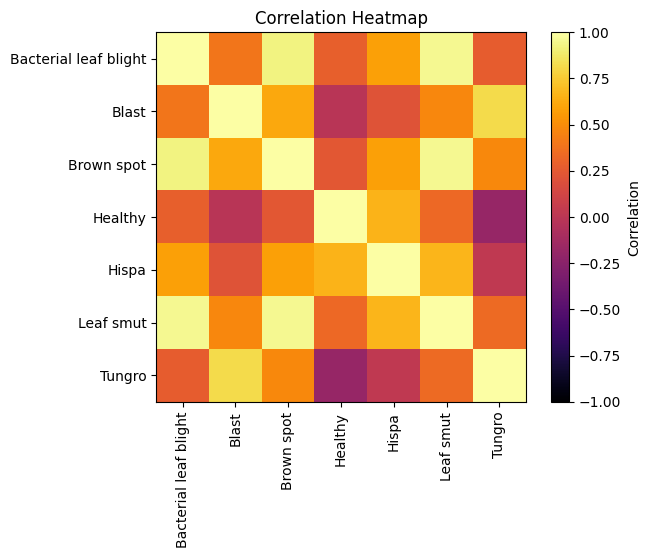

In [46]:

class_avg_images = [np.mean(images, axis=0) for images in images_dict.values()]


class_avg_images_flattened = [avg_img.flatten() for avg_img in class_avg_images]

# Calculate the correlation matrix
correlations = np.corrcoef(class_avg_images_flattened)


plt.imshow(correlations, cmap='inferno', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(data.class_names)), data.class_names, rotation=90)
plt.yticks(range(len(data.class_names)), data.class_names)
plt.title('Correlation Heatmap')
plt.show()

1. Imported `train_test_split` from `sklearn.model_selection`.
2. Converted images and labels to numpy arrays (`X` and `y`).
3. Normalized the images by dividing by 255.0.
4. Split the data into training and testing sets using `train_test_split` with a test size of 0.2 and a random state of 42.


In [47]:
from sklearn.model_selection import train_test_split

# Convert images and labels to numpy arrays
X = np.array([img for images in images_dict.values() for img in images])
y = np.array([label for label, images in enumerate(images_dict.values()) for _ in images])

# Normalize the images
X = X / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(226, 224, 224, 3)

In [49]:
y_test.shape

(57,)

1. Imported necessary layers and models from TensorFlow/Keras (`Sequential`, `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`).
2. Defined a sequential model using the `Sequential` class.
3. Added layers to the model: three Conv2D layers with increasing filter sizes and MaxPooling2D layers to downsample the feature maps.
4. Flattened the output and added Dense layers for classification.
5. Compiled the model using the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy as the metric.
6. Trained the model using the training data (`X_train`, `y_train`) with specified epochs, batch size, and validation data (`X_test`, `y_test`).


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input


model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(data.class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.1658 - loss: 2.9329 - val_accuracy: 0.2807 - val_loss: 1.6571
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.3794 - loss: 1.5586 - val_accuracy: 0.4912 - val_loss: 1.3052
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.3883 - loss: 1.3783 - val_accuracy: 0.4211 - val_loss: 1.0739
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 349ms/step - accuracy: 0.3620 - loss: 1.2265 - val_accuracy: 0.5263 - val_loss: 1.0410
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step - accuracy: 0.5059 - loss: 1.1379 - val_accuracy: 0.5263 - val_loss: 0.9254
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - accuracy: 0.5781 - loss: 1.0671 - val_accuracy: 0.4561 - val_loss: 1.2317
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 333ms/step - accuracy: 0.5663 - loss: 0.9806 - val_accuracy: 0.6316 - val_loss: 0.9121
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - accuracy: 0.6471 - loss: 0.9223 - val_accuracy: 0.

In [54]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f'Test accuracy: {accuracy * 100}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.8310 - loss: 1.3142
Test accuracy: 82.45614171028137%


Based on the training and validation loss  it appears model might be slightly overfitting.
our training accuracy generally increases over time, which is a good sign. It suggests the model is learning to correctly classify images within  training dataset.
but our validation accuracy also increases, but at times it seems to slightly fluctuate or plateau.
Gap Between Training and Validation Accuracy: There's a noticeable gap developing between your final training accuracy (around 0.94) and validation accuracy (around 0.82).


In [68]:
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


report = classification_report(y_test, y_pred_classes, target_names=data.class_names)


print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
                       precision    recall  f1-score   support

Bacterial leaf blight       0.88      1.00      0.93         7
                Blast       0.89      0.73      0.80        11
           Brown spot       1.00      0.67      0.80         6
              Healthy       0.75      0.75      0.75         8
                Hispa       0.67      0.67      0.67         6
            Leaf smut       0.80      1.00      0.89         8
               Tungro       0.83      0.91      0.87        11

             accuracy                           0.82        57
            macro avg       0.83      0.82      0.82        57
         weighted avg       0.83      0.82      0.82        57



In [60]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,509,591 (127.83 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,339,728 (85.22 MB)

Now we used method data augmentation to increase the performance
1. Imported necessary modules from TensorFlow/Keras (`Sequential`, `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Dropout`, `ImageDataGenerator`, `Adam`, `plot_model`).
2. Defined a sequential model using the Sequential class and added convolutional, pooling, flattening, dense, and dropout layers.
3. Compiled the model using the Adam optimizer with a specified learning rate, sparse categorical cross-entropy loss, and accuracy as the metric.
4. Created an ImageDataGenerator object for data augmentation, specifying rotation range, width and height shift ranges, and horizontal flip.
5. Trained the model using data augmentation with the flow method from ImageDataGenerator, specified epochs, and validation data.
6. Evaluated the trained model using the test data to calculate test loss and accuracy, and printed the test accuracy.


In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Define the model architecture using functional API
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer
model.add(Dense(len(data.class_names), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/30


c:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - accuracy: 0.1754 - loss: 2.4341 - val_accuracy: 0.5263 - val_loss: 1.2516
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.5101 - loss: 1.3383 - val_accuracy: 0.5263 - val_loss: 1.0555
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.4721 - loss: 1.2139 - val_accuracy: 0.3509 - val_loss: 1.2378
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - accuracy: 0.4428 - loss: 1.2108 - val_accuracy: 0.6140 - val_loss: 0.9416
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.3794 - loss: 1.3344 - val_accuracy: 0.5439 - val_loss: 1.0827
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 370ms/step - accuracy: 0.5136 - loss: 1.0355 - val_accuracy: 0.5789 - val_loss: 1.1385
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.5378 - loss: 1.0697 - val_accuracy: 0.6667 - val_loss: 0.8321
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.5490 - loss: 1.1068 - val_accuracy: 0.5789 - v

In [70]:
from sklearn.metrics import classification_report

# Make predictions using the trained model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate a classification report
report = classification_report(y_test, y_pred_classes, target_names=data.class_names)

# Print the classification report
print(report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
                       precision    recall  f1-score   support

Bacterial leaf blight       0.88      1.00      0.93         7
                Blast       0.89      0.73      0.80        11
           Brown spot       1.00      0.67      0.80         6
              Healthy       0.75      0.75      0.75         8
                Hispa       0.67      0.67      0.67         6
            Leaf smut       0.80      1.00      0.89         8
               Tungro       0.83      0.91      0.87        11

             accuracy                           0.82        57
            macro avg       0.83      0.82      0.82        57
         weighted avg       0.83      0.82      0.82        57



The model seems to be a good fit. Here's why:

The training accuracy and validation accuracy are both increasing, which is a good sign. By the end of the training, the model achieves around 73% accuracy on the training set and 82% on the validation set.

The training loss and validation loss are both decreasing, which is also a good sign. By the end of the training, the model achieves a loss of around 0.69 on the training set and 0.46 on the validation set.

There is not a large gap between the training and validation accuracy or between the training and validation loss. This suggests that the model is not overfitting. If the model were overfitting, we would expect to see a high training accuracy and a much lower validation accuracy. Similarly, we would expect to see a low training loss and a much higher validation loss.

The model is not underfitting either. If the model were underfitting, we would expect to see both the training and validation accuracy to be low and both the training and validation loss to be high.